# Agglomerative Clustering on ABA

In [9]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline
%run nifti_tools.ipynb

In [4]:
# With variance of 80%
X = np.load('/data/bioprotean/ABA/KernelPCA/poly2/31512_80v_components.npy')

start_time = time.time()

n_clusters = 594
AC = AgglomerativeClustering(n_clusters=n_clusters)
AC.fit_predict(X)
labels = AC.labels_

print('Running time is ', (time.time() - start_time))

Running time is  277.41763138771057


In [5]:
# Reconstructing the clusters
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

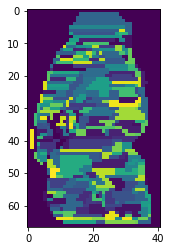

In [7]:
# Visualizing slices
slice = labels_rc[:,25,:]
plt.imshow(slice)

**Trying the distance_threshold**

In [18]:
# With variance of 80%
X = np.load('/data/bioprotean/ABA/KernelPCA/poly2/31512_80v_components.npy')

start_time = time.time()

AC = AgglomerativeClustering(distance_threshold=9, n_clusters=None)
AC.fit_predict(X)
labels = AC.labels_

print('Running time is ', (time.time() - start_time))

Running time is  264.86687994003296


In [19]:
# Reconstructing the clusters
indices_path = '/data/bioprotean/ABA/MEMMAP/genes_list/half_indices.npy'
labels_rc = reconstruct_ABA(labels, indices_path)

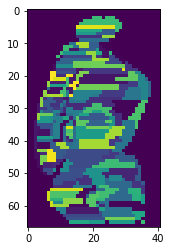

In [27]:
# Visualizing slices
slice = labels_rc[:,20,:]
plt.imshow(slice)

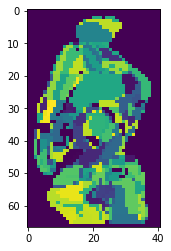

In [37]:
# Loading annotations
annot_path = '/data/bioprotean/ABA/PCA/80_variance/allen_annot200.nii'
annot_arr = nifti_to_array(annot_path)

# Visualizing slices
slice = annot_arr[:,20,:]
threshold = (slice<10000) * slice
plt.imshow(threshold)